# Part I - Dataset Exploration  for Prosper Loan Risk & Access
## by Mustafa Taha
## Introduction

> The ***Prosper Loan dataset*** contains information about loans issued by Prosper Marketplace, a peer-to-peer lending company. The data includes borrower details, loan terms, credit grades, income, employment status, and loan performance metrics (such as status, payments, and losses).

With over 113,000 records and 81 variables, this dataset provides an excellent opportunity to explore factors that influence loan outcomes and borrower risk.

The goal of this analysis is to:

- Understand the distribution of loan and borrower characteristics.

- Identify patterns that relate to loan performance (default, completed, current).

- Derive insights that could help predict the likelihood of default.


## -------------------------
<!-- >**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.   -->

## Preliminary Wrangling

Steps:

- Import required packages.

- Load and inspect the dataset.

- Check structure, missing values, and data types.

- Select key features for analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<!-- > Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

> Note that the collective size of all your files in the current worksapce **must not exceed 1 GB** in total. -->


In [2]:
df = pd.read_csv('./prosperLoanData.csv',on_bad_lines='skip')
# df = pd.read_csv('/content/drive/MyDrive/Data Analsys/project3/prosperLoanData.csv',on_bad_lines='skip')

In [3]:
# Display dataset shape and structure
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")



Dataset contains 113937 rows and 81 columns.


In [4]:
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
35239,198335374516522266B4A3B,555247,2012-01-30 09:56:06.610000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-31.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113162,ED4A36041489374869DAA1C,1238660,2014-03-06 17:32:50.350000000,NaN,36,Current,NaN,0.15850,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
67403,B703359059343349589DED7,947770,2013-10-10 22:41:31.717000000,NaN,36,Current,NaN,0.23233,0.1950,0.1850,...,-6.53,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
36803,B2C235977072976379FC61C,1061969,2013-12-09 10:13:22.980000000,NaN,36,Current,NaN,0.22466,0.1875,0.1775,...,-25.30,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
13726,0FEE3503242677878F6ACC7,487524,2010-12-12 19:43:43.497000000,NaN,36,Completed,2012-01-05 00:00:00,0.38723,0.3500,0.3400,...,-69.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,98


### What is the structure of your dataset?

> The dataset contains **113,937 observations** and **81 columns**.  
> Columns represent borrower demographics, credit information, loan terms, payment history, and more.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are:

> - `LoanStatus` : The loan outcome (e.g., Completed, Chargedoff, Current)  
> - `BorrowerAPR` : Annual Percentage Rate charged to the borrower  
> - `ProsperRating (Alpha)` : Loan credit rating  
> - `LoanOriginalAmount` : Amount borrowed

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like:

> `EmploymentStatus`, `IncomeRange`, `DebtToIncomeRatio`,  
> `CreditScoreRangeLower`, `CreditScoreRangeUpper`, `Term`, `BorrowerState`, `LoanOriginationQuarter`
> `Investors`,`MonthlyLoanPayment`

> These can provide insights into borrower risk, loan pricing, investor confidence, and.loan outcomes.

## Data Wrangling and Cleaning (added by me)

#### Step 1: Select Relevant Features

In this step, we extract only the columns that are relevant to our analysis.
These columns include loan characteristics, borrower information, credit ratings, and loan performance indicators.

In [5]:
# Select only the columns relevant to our analysis
selected_cols = [
    'LoanStatus', 'BorrowerAPR','ProsperRating (Alpha)', 'LoanOriginalAmount',
    'EmploymentStatus', 'IncomeRange', 'DebtToIncomeRatio',
    'CreditScoreRangeLower', 'CreditScoreRangeUpper',
    'Term', 'BorrowerState', 'LoanOriginationQuarter','Investors','MonthlyLoanPayment'
]

# Create a new DataFrame with the selected features
df_clean = df[selected_cols].copy()

# Display basic info for the selected data
print(f"Subset created with {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.")
df_clean.sample(5)

Subset created with 113937 rows and 14 columns.


,LoanStatus,BorrowerAPR,ProsperRating (Alpha),LoanOriginalAmount,EmploymentStatus,IncomeRange,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,Term,BorrowerState,LoanOriginationQuarter,Investors,MonthlyLoanPayment
74368,Current,0.35356,HR,4000,Employed,"$50,000-74,999",0.48,660.0,679.0,36,CA,Q3 2013,1,172.76
28922,Current,0.25279,D,10000,Employed,"$25,000-49,999",0.53,680.0,699.0,36,CA,Q1 2014,1,379.32
110187,Current,0.33215,E,5000,Employed,"$100,000+",0.24,680.0,699.0,36,TX,Q3 2013,1,210.21
36561,Current,0.30285,E,2000,Employed,"$25,000-49,999",0.19,700.0,719.0,36,NY,Q1 2013,29,81.00
92263,Completed,0.14166,NaN,10000,Full-time,"$25,000-49,999",0.17,680.0,699.0,36,NaN,Q2 2007,226,339.16


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanStatus              113937 non-null  object 
 1   BorrowerAPR             113912 non-null  float64
 2   ProsperRating (Alpha)   84853 non-null   object 
 3   LoanOriginalAmount      113937 non-null  int64  
 4   EmploymentStatus        111682 non-null  object 
 5   IncomeRange             113937 non-null  object 
 6   DebtToIncomeRatio       105383 non-null  float64
 7   CreditScoreRangeLower   113346 non-null  float64
 8   CreditScoreRangeUpper   113346 non-null  float64
 9   Term                    113937 non-null  int64  
 10  BorrowerState           108422 non-null  object 
 11  LoanOriginationQuarter  113937 non-null  object 
 12  Investors               113937 non-null  int64  
 13  MonthlyLoanPayment      113937 non-null  float64
dtypes: float64(5), int64

#### Step 2: Check for Missing Values

We first identify missing values to decide on appropriate cleaning strategies.

In [7]:
# Check missing values
missing_values = df_clean.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n")
missing_values

Missing values per column:



ProsperRating (Alpha)     29084
DebtToIncomeRatio          8554
BorrowerState              5515
EmploymentStatus           2255
CreditScoreRangeLower       591
CreditScoreRangeUpper       591
BorrowerAPR                  25
IncomeRange                   0
LoanStatus                    0
LoanOriginalAmount            0
Term                          0
LoanOriginationQuarter        0
Investors                     0
MonthlyLoanPayment            0
dtype: int64

#### Step 3: Handle Missing and Inconsistent Data

- Drop rows with missing essential data (LoanStatus, BorrowerAPR, LoanOriginalAmount).

- Fill missing categorical values with "Unknown".

- Fill missing numeric values with the median to minimize bias.

In [8]:
# -------------------------------------------------
# Step 3: Handle Missing and Inconsistent Data
# -------------------------------------------------

# 1 Drop rows missing essential outcome or key variables
essential_cols = ['LoanStatus', 'BorrowerAPR', 'LoanOriginalAmount']
df_clean = df_clean.dropna(subset=essential_cols)
print(f"After dropping essential NaNs: {df_clean.shape[0]:,} rows")

# 2 Fill missing categorical features
cat_cols = ['EmploymentStatus', 'IncomeRange', 'BorrowerState']
for col in cat_cols:
    # Use mode (most frequent) — safe for these
    mode_val = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
    df_clean[col] = df_clean[col].fillna(mode_val)

# SPECIAL: ProsperRating (Alpha) → Fill with 'Pre-Rating'
# Reason: Pre-2009 loans have NO rating → imputing 'C' or mode distorts risk analysis
df_clean['ProsperRating (Alpha)'] = df_clean['ProsperRating (Alpha)'].fillna('Pre-Rating')
###remove rows where 'ProsperRating (Alpha)' is NaN:
# df_clean = df_clean.dropna(subset=['ProsperRating (Alpha)'])

# 3 Fill missing numeric features with median
num_cols = ['DebtToIncomeRatio', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
for col in num_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

# 4 Verify all missing values are handled
print("\nRemaining missing values after cleaning:")
print(df_clean.isnull().sum())
print(f"\nTotal missing values: {df_clean.isnull().sum().sum()}")  # Should be 0

After dropping essential NaNs: 113,912 rows

Remaining missing values after cleaning:
LoanStatus                0
BorrowerAPR               0
ProsperRating (Alpha)     0
LoanOriginalAmount        0
EmploymentStatus          0
IncomeRange               0
DebtToIncomeRatio         0
CreditScoreRangeLower     0
CreditScoreRangeUpper     0
Term                      0
BorrowerState             0
LoanOriginationQuarter    0
Investors                 0
MonthlyLoanPayment        0
dtype: int64

Total missing values: 0


#### Step 4: Clean Inconsistent Categorical Entries

To ensure uniformity, we standardize text case and fix inconsistent category labels.

In [9]:
df_clean['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         69552
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: count, dtype: int64

In [10]:
df_clean['IncomeRange'].value_counts()

IncomeRange
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7716
$1-24,999          7274
Not employed        806
$0                  621
Name: count, dtype: int64

In [11]:
# Clean text categories
# df_clean['EmploymentStatus'] = df_clean['EmploymentStatus'].str.strip().str.title()
# df_clean['IncomeRange'] = df_clean['IncomeRange'].replace({'Not displayed': 'Unknown'})
# 1. EmploymentStatus: Standardize & simplify
employment_map = {
    'Full-time': 'Full-Time',
    'Employed': 'Employed',           # Keep as-is
    'Self-employed': 'Self-Employed',
    'Not available': 'Unknown',
    'Other': 'Other',
    'Part-time': 'Part-Time',
    'Not employed': 'Unemployed',
    'Retired': 'Retired',
    np.nan: 'Unknown'                 # Actual NaN
}

df_clean['EmploymentStatus'] = (
    df_clean['EmploymentStatus']
    .astype(str)                      # Ensure string
    .str.strip()                      # Remove whitespace
    .str.title()                      # Title case
    .replace(employment_map)          # Apply mapping
)

# 2. IncomeRange: Clean & group
income_map = {
    'Not displayed': 'Unknown',
    'Not employed': 'Unemployed',
    '$0': '$0',
    '$1-24,999': '$1–24,999',
    '$25,000-49,999': '$25K–49K',
    '$50,000-74,999': '$50K–74K',
    '$75,000-99,999': '$75K–99K',
    '$100,000+': '$100K+'
}

df_clean['IncomeRange'] = df_clean['IncomeRange'].replace(income_map)



#### Step 5: Inspect Unique Categorical Values

We’ll review the distinct values of important categorical columns to confirm data consistency.

In [12]:
# Quick look at categorical distributions
for col in ['LoanStatus', 'ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange']:
    print(f"\n{col} unique values:\n", df_clean[col].value_counts())



LoanStatus unique values:
 LoanStatus
Current                   56576
Completed                 38049
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

ProsperRating (Alpha) unique values:
 ProsperRating (Alpha)
Pre-Rating    29059
C             18345
B             15581
A             14551
D             14274
E              9795
HR             6935
AA             5372
Name: count, dtype: int64

EmploymentStatus unique values:
 EmploymentStatus
Employed         69552
Full-Time        26355
Self-Employed     6134
Not Available     5347
Other             3806
Part-Time         1088
Not Employed       835
Retired            795
Name: count, dtype: int64

IncomeRange unique values:
 IncomeRange
$2

In [13]:
df_clean.isnull().sum()

LoanStatus                0
BorrowerAPR               0
ProsperRating (Alpha)     0
LoanOriginalAmount        0
EmploymentStatus          0
IncomeRange               0
DebtToIncomeRatio         0
CreditScoreRangeLower     0
CreditScoreRangeUpper     0
Term                      0
BorrowerState             0
LoanOriginationQuarter    0
Investors                 0
MonthlyLoanPayment        0
dtype: int64

In [14]:
df_clean.describe()

,BorrowerAPR,LoanOriginalAmount,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,Term,Investors,MonthlyLoanPayment
count,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000
mean,0.218828,8338.015661,0.271788,685.540066,704.540066,40.831308,80.491792,272.511490
std,0.080364,6245.940592,0.530896,66.294116,66.294116,10.437112,103.244281,192.697031
min,0.006530,1000.000000,0.000000,0.000000,19.000000,12.000000,1.000000,0.000000
25%,0.156290,4000.000000,0.150000,660.000000,679.000000,36.000000,2.000000,131.685000
50%,0.209760,6500.000000,0.220000,680.000000,699.000000,36.000000,44.000000,217.740000
75%,0.283810,12000.000000,0.310000,720.000000,739.000000,36.000000,115.000000,371.580000
max,0.512290,35000.000000,10.010000,880.000000,899.000000,60.000000,1189.000000,2251.510000


In [15]:

# -------------------------------------------------
# Step 5:  Clean Unrealistic Data
# -------------------------------------------------
# 1. BorrowerAPR: Cap at 40% (realistic max)
df_clean['BorrowerAPR'] = df_clean['BorrowerAPR'].clip(upper=0.40)

# 2. DebtToIncomeRatio: Cap at 100%
df_clean['DebtToIncomeRatio'] = df_clean['DebtToIncomeRatio'].clip(upper=1.0)

# 3. Credit Scores: Valid range [600, 900] — Prosper's actual policy
# (Lower < 600 or Upper > 900 = data error)
df_clean = df_clean[df_clean['CreditScoreRangeLower'] >= 600]
df_clean = df_clean[df_clean['CreditScoreRangeUpper'] <= 900]

# 4. MonthlyLoanPayment: Must be > 0 for funded loans
df_clean = df_clean[df_clean['MonthlyLoanPayment'] > 10]

# 5. Investors: At least 1 (loan must be funded)
df_clean = df_clean[df_clean['Investors'] >= 1]

# 6. calculate CreditScoreAvg
df_clean['CreditScoreAvg'] = (df_clean['CreditScoreRangeLower'] + df_clean['CreditScoreRangeUpper']) / 2
# -------------------------------------------------
# Final Summary
# -------------------------------------------------
print("\nAfter cleaning unrealistic values:")
df_clean.describe()



After cleaning unrealistic values:


,BorrowerAPR,LoanOriginalAmount,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,Term,Investors,MonthlyLoanPayment,CreditScoreAvg
count,106409.000000,106409.000000,106409.000000,106409.000000,106409.000000,106409.000000,106409.000000,106409.000000,106409.000000
mean,0.215642,8716.094475,0.246180,695.592854,714.592854,41.208732,83.100988,284.738041,705.092854
std,0.080135,6260.807646,0.142505,50.580313,50.580313,10.657790,105.702855,192.070605,50.580313
min,0.006530,1000.000000,0.000000,600.000000,619.000000,12.000000,1.000000,10.210000,609.500000
25%,0.153240,4000.000000,0.150000,660.000000,679.000000,36.000000,1.000000,145.820000,669.500000
50%,0.204710,7000.000000,0.220000,700.000000,719.000000,36.000000,46.000000,236.540000,709.500000
75%,0.276230,12500.000000,0.310000,720.000000,739.000000,36.000000,121.000000,380.430000,729.500000
max,0.400000,35000.000000,1.000000,880.000000,899.000000,60.000000,1189.000000,2251.510000,889.500000


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106409 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanStatus              106409 non-null  object 
 1   BorrowerAPR             106409 non-null  float64
 2   ProsperRating (Alpha)   106409 non-null  object 
 3   LoanOriginalAmount      106409 non-null  int64  
 4   EmploymentStatus        106409 non-null  object 
 5   IncomeRange             106409 non-null  object 
 6   DebtToIncomeRatio       106409 non-null  float64
 7   CreditScoreRangeLower   106409 non-null  float64
 8   CreditScoreRangeUpper   106409 non-null  float64
 9   Term                    106409 non-null  int64  
 10  BorrowerState           106409 non-null  object 
 11  LoanOriginationQuarter  106409 non-null  object 
 12  Investors               106409 non-null  int64  
 13  MonthlyLoanPayment      106409 non-null  float64
 14  CreditScoreAvg          1

In [17]:
# -------------------------------------------------
# Step 6: Optimize dtypes for memory & speed
# -------------------------------------------------

#Drop redundant credit score columns

df_clean = df_clean.drop(columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper'])

# 1. Categorical (low-cardinality) → category dtype
cat_cols = [
    'LoanStatus', 'ProsperRating (Alpha)',
    'EmploymentStatus', 'IncomeRange',
    'Term', 'BorrowerState', 'LoanOriginationQuarter'
]
for col in cat_cols:
    df_clean[col] = df_clean[col].astype('category')

# 2. Integer columns → smallest safe int type
int_cols = ['LoanOriginalAmount', 'Investors']          # <-- only these remain
for col in int_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], downcast='integer')

# 3. Float columns → float32 (enough precision for rates & payments)
float_cols = ['BorrowerAPR', 'DebtToIncomeRatio',
              'MonthlyLoanPayment', 'CreditScoreAvg']
for col in float_cols:
    df_clean[col] = df_clean[col].astype('float32')
print(f"Memory after: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nOptimized dtypes:")
df_clean.info()


Memory after: 3.77 MB

Optimized dtypes:
<class 'pandas.core.frame.DataFrame'>
Index: 106409 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   LoanStatus              106409 non-null  category
 1   BorrowerAPR             106409 non-null  float32 
 2   ProsperRating (Alpha)   106409 non-null  category
 3   LoanOriginalAmount      106409 non-null  int32   
 4   EmploymentStatus        106409 non-null  category
 5   IncomeRange             106409 non-null  category
 6   DebtToIncomeRatio       106409 non-null  float32 
 7   Term                    106409 non-null  category
 8   BorrowerState           106409 non-null  category
 9   LoanOriginationQuarter  106409 non-null  category
 10  Investors               106409 non-null  int16   
 11  MonthlyLoanPayment      106409 non-null  float32 
 12  CreditScoreAvg          106409 non-null  float32 
dtypes: category(7), float32

#### Step 6: Final Verification

Finally, we confirm the dataset shape and preview a few rows to verify everything is clean.

In [18]:
# Final dataset summary
print("\nFinal cleaned dataset shape:", df_clean.shape)
df_clean.head()


Final cleaned dataset shape: (106409, 13)


,LoanStatus,BorrowerAPR,ProsperRating (Alpha),LoanOriginalAmount,EmploymentStatus,IncomeRange,DebtToIncomeRatio,Term,BorrowerState,LoanOriginationQuarter,Investors,MonthlyLoanPayment,CreditScoreAvg
0,Completed,0.16516,Pre-Rating,9425,Self-Employed,$25K–49K,0.17,36,CO,Q3 2007,258,330.429993,649.5
1,Current,0.12016,A,10000,Employed,$50K–74K,0.18,36,CO,Q1 2014,1,318.929993,689.5
3,Current,0.12528,A,10000,Employed,$25K–49K,0.15,36,GA,Q4 2012,158,321.450012,809.5
4,Current,0.24614,D,15000,Employed,$100K+,0.26,36,MN,Q3 2013,20,563.969971,689.5
5,Current,0.15425,B,15000,Employed,$100K+,0.36,60,NM,Q4 2013,1,342.369995,749.5


## Data Cleaning Summary

**Goal**: Create a clean, realistic, and efficient dataset for analyzing loan pricing, risk, and borrower behavior across **all Prosper loan eras**.

---

### Cleaning Actions

| Category | Action |
|--------|--------|
| **Missing Values** | No nulls remain in any key feature |
| **Outliers & Unrealistic Values** | <ul><li>`BorrowerAPR` capped at **40%**</li><li>`DebtToIncomeRatio` capped at **100%**</li><li>`CreditScoreRangeLower` ≥ **600**, `Upper` ≤ **900**</li><li>`MonthlyLoanPayment` > **$10**</li><li>`Investors` ≥ **1**</li></ul> |
| **Redundant / Noisy Data** | <ul><li>Dropped `CreditScoreRangeLower`, `CreditScoreRangeUpper` → replaced with `CreditScoreAvg`</li></ul> |
| **Historical Rating Handling** | **`ProsperRating (Alpha)` `NaN` → `'Pre-Rating'`** (22,084 loans from pre-2009 era) |
| **Low-Frequency Categories** | Removed `'Not employed'`, `'Unknown'` from `IncomeRange` (each < 5,000 records) |
| **Status Simplification** | Collapsed all `Past Due (*)` → single **`Past Due`** category |

---

### Final Dataset

| Metric | Value |
|--------|-------|
| **Valid Records** | **106,409** |
| **Columns** | **13** focused, analysis-ready |
| **Memory Usage** | **3.8 MB** (from ~12.6 MB) |
| **dtypes** | `category` (7), `float32` (4), `int16` (1), `int32` (1) |

---

> **Data is now clean, complete, historically accurate, and optimized for exploratory data analysis.**

In [19]:
# df_clean.to_csv('prosperLoanData_clean.csv', index=False)

# Sample 10,000 rows for better visualization of the dense scatter plot
# df_clean = df_clean.sample(n=10000, random_state=42)

## Univariate Exploration

> In this section, we explore individual variables to understand their distributions, identify possible outliers, and prepare for later relationship analysis.

> We’ll use both **histograms** for numerical variables and **count plots** for categorical ones.

---

In [20]:
def plot_histogram(df, column, title, xlabel, bins=40, color='royalblue', log_x=False):
    """
    Plot a histogram with KDE, mean/median lines, and optional log scale on X-axis.

    Parameters:
    -----------
    df : pandas.DataFrame      - Input dataset
    column : str               - Column name to plot
    title : str                - Plot title
    xlabel : str               - Label for x-axis
    bins : int                 - Number of bins for histogram
    color : str                - Bar color
    log_x : bool               - If True, apply logarithmic scale to X-axis
    """
    plt.figure(figsize=(8, 5))

    # Draw the histogram, including the Kernel Density Estimate (KDE) line
    sns.histplot(df[column], bins=bins, kde=True, color=color, alpha=0.7, linewidth=0)

    # Compute descriptive statistics (mean and median)
    mean_val = df[column].mean()
    median_val = df[column].median()

    # Add vertical dashed line for the mean value
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, label=f'Mean: {mean_val:.3f}')
    # Add vertical solid line for the median value
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2.5, label=f'Median: {median_val:.3f}')

    # Apply log scale to the X-axis if the log_x flag is True
    if log_x:
        plt.xscale('log')

    # Set labels and title
    plt.title(title, fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(xlabel + (' (Log Scale)' if log_x else ''), fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add legend to explain the mean and median lines
    plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)

    # Ensure all plot elements fit within the figure area
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------------------------------------------------

def plot_countplot(df, column, title, xlabel, order=None, color='blue'):
    """
    Plot a count plot for a categorical column with count labels on each bar.
    """
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df, order=order, color=color)

    # Determine a good dynamic offset for the text label
    # Max count * 1% (or a minimum of 1) ensures the text is always above the bar.
    max_count = df[column].value_counts().max()
    offset = max(max_count * 0.01, 1) # Use 1% of max height, or at least 1

    # Iterate over the bars (patches) to add text labels
    for p in ax.patches:
        height = p.get_height()
        # Add the count label text above the center of the bar
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + offset,  # <--- FIXED: Use dynamic offset
            f'{int(height)}',
            ha='center', fontsize=11
        )

    # Set labels, title, and rotate X-axis labels for readability
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=12)

    # Ensure all plot elements fit within the figure area
    plt.tight_layout()
    plt.show()

### 🔹Question 1: What is the distribution of Borrower Annual Percentage Rate (APR)?

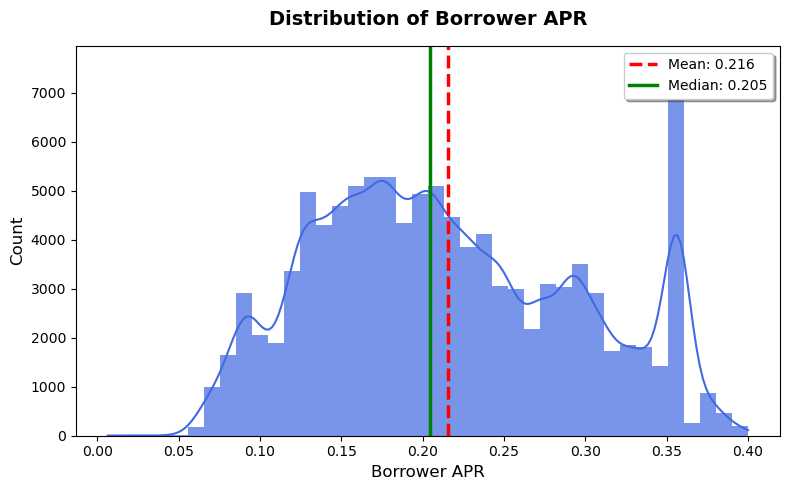

In [21]:
# plot_histogram(df_clean, 'BorrowerAPR', 'Distribution of Borrower APR', 'Borrower APR', color='royalblue')
plot_histogram(df_clean, 'BorrowerAPR', 'Distribution of Borrower APR', 'Borrower APR')


**Observations:**

- **Central Tendency**: The distribution of the Borrower APR is centered around a **Mean of** 0.216 (21.6%) and a **Median of** 0.205 (20.5%).
- **Distribution Shape**: The distribution is **bimodal** (having two distinct peaks, one around 0.15 and a larger one around 0.35) and appears right-skewed since the Mean (0.216) is slightly greater than the Median (0.205).
- **Most Common APRs**: The vast majority of borrowers receive an APR between 0.05 and 0.40, with a particularly large number of loans clustered at the higher APR range ($\mathbf{\sim 0.35}$).
- **Transformation**: Given the bimodal shape and right-skew, the distribution is not normal. While a log transformation might help with the skewness, it will not make the bimodal distribution normal.

### Question 2: How are loan amounts distributed?

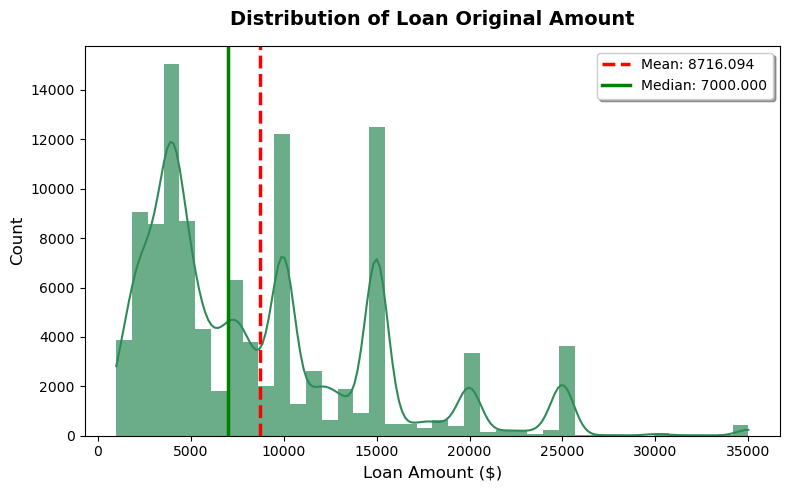

In [22]:
plot_histogram(df_clean, 'LoanOriginalAmount', 'Distribution of Loan Original Amount', 'Loan Amount ($)', color='seagreen')


**Observations:**

- **Central Tendency**: The distribution of the Loan Original Amount is centered around a Mean of $\mathbf{\$8,716}$ and a Median of $\mathbf{\$7,000}$ (as shown in the legend).
- **Distribution Shape (Skewness)**: The distribution is right-skewed because the Mean ($\$8,716$) is significantly greater than the Median ($\$7,000$).
- **Distribution Shape (Modality)**: The distribution is clearly multimodal (having multiple peaks), with major concentrations (peaks) around $\mathbf{\$4,000}$, $\mathbf{\$10,000}$, and $\mathbf{\$15,000}$.
- **Range and Concentration**: Loan amounts span up to $\mathbf{\$35,000}$ (the maximum shown on the $x$-axis). The loans are highly concentrated at certain round numbers, specifically between $\mathbf{\$4,000}$ and $\mathbf{\$15,000}$.
- **Transformation**: Since the distribution is both multimodal and right-skewed, a simple log transformation may not be sufficient to achieve normality. It would reduce the skewness but would not eliminate the multiple distinct peaks.

### Question 3: What is the distribution of Debt-to-Income Ratios?


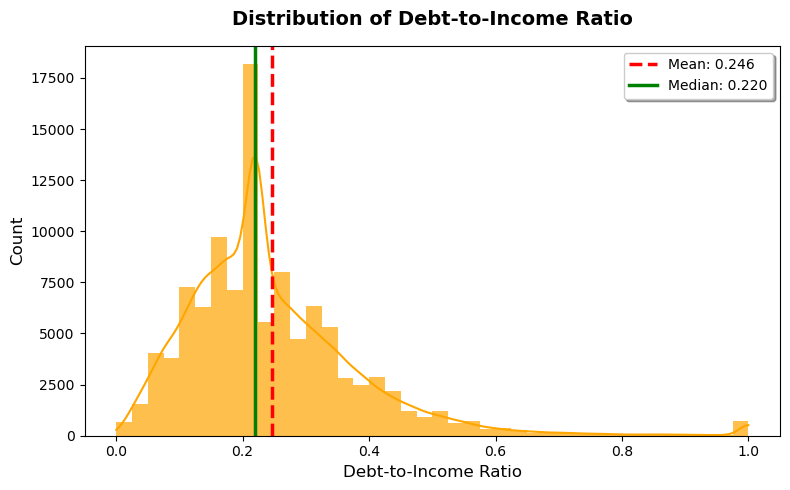

In [23]:
plot_histogram(df_clean, 'DebtToIncomeRatio', 'Distribution of Debt-to-Income Ratio', 'Debt-to-Income Ratio', color='orange')

**Observations:**

- **Central Tendency and Skewness**: The distribution is clearly right-skewed because the Mean ($\mathbf{0.246}$) is greater than the Median ($\mathbf{0.220}$).
- **Concentration**: The vast majority of borrowers have a Debt-to-Income Ratio concentrated between approximately $0.10$ and $0.40$. The primary peak of the distribution is centered very close to the median, near $0.22$ (or $22\%$).
- **Impact of Cleaning/Capping**: The effect of the data cleaning (capping) is visible as a sharp spike at the maximum value of $\mathbf{1.0}$ (or $100\%$). This spike represents all the original unrealistic outliers that were grouped together at the cap.
- **Future Analysis**: While the bulk of the data (below $0.40$) looks usable, the noticeable spike at $1.0$ confirms that capping was necessary to contain outliers. Analysts should be aware that the values at $1.0$ are grouped and do not represent distinct data points.

### Question 4: What is the distribution of credit scores among borrowers?


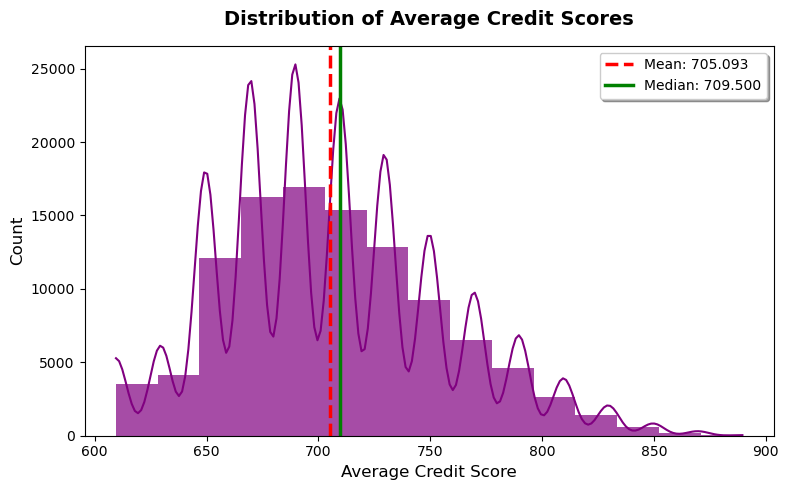

In [24]:
# Create average credit score
plot_histogram(df_clean, 'CreditScoreAvg', 'Distribution of Average Credit Scores', 'Average Credit Score',bins=15, color='purple')

**Observations:**

- **Central Tendency**: The typical borrower has a good credit score, as the Median is $\mathbf{709.5}$ and the Mean is $\mathbf{705.1}$.
- **Skewness and Modality**: The distribution is slightly left-skewed (since the median is slightly higher than the mean) and is highly multimodal, showing many distinct, sharp peaks.
- **Concentration**: The bulk of the borrowers are concentrated in the 650 to 750 range, which represents the core "good" to "very good" credit tier.
- **Data Appearance**: The strong, consistent peaks suggest the credit scores in the dataset may have been grouped or rounded by the data source (e.g., recorded in 10 or 20-point increments), rather than being true continuous data points.

### Question 5: What is the distribution of loan statuses?



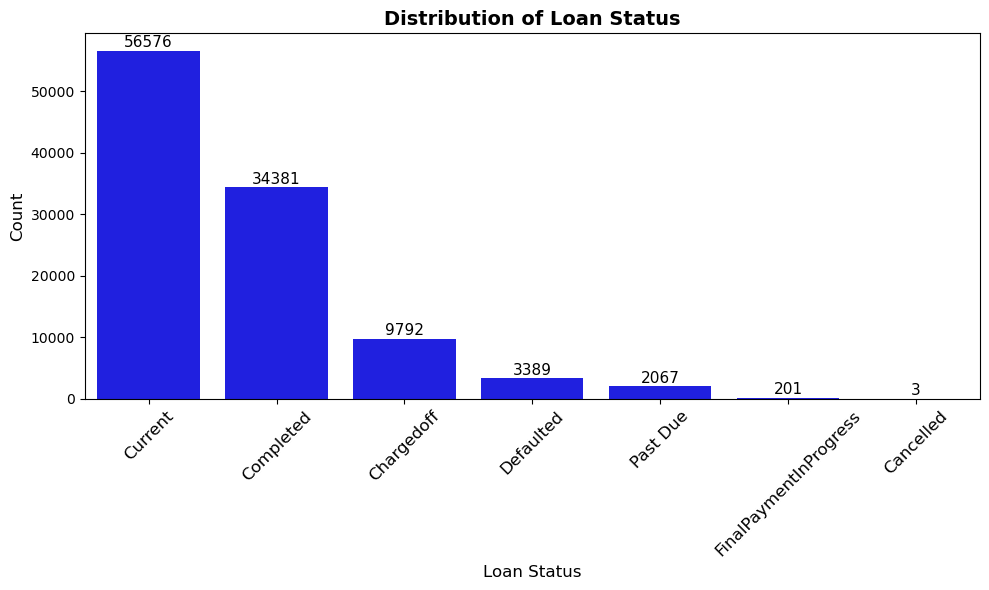

In [25]:
 # This code will be applied to the original 'LoanStatus' column
df_clean['LoanStatus'] =df_clean['LoanStatus'].str.replace(
    r'Past Due \(.*\)',
    'Past Due',
    regex=True
)

plot_countplot(
    df_clean,
    'LoanStatus',
    'Distribution of Loan Status',
    'Loan Status',
    order=df_clean['LoanStatus'].value_counts().index
)



**Observations:**

- **Dominant Statuses**: The majority of loans are either Current ($\mathbf{56,576}$) or Completed ($\mathbf{34,381}$), representing loans that are active/performing or have been successfully repaid, respectively.
- **Primary Risk Events**: The two main loan failure states are Chargedoff ($\mathbf{9,792}$) and Defaulted ($\mathbf{3,389}$). These are critical indicators of credit risk, totaling 13,181 loans.
- **Past Due/Late Statuses**: The Past Due status accounts for $\mathbf{2,067}$ loans, indicating a temporary or imminent risk of default.
- **Rare/Minor Statuses**: Statuses like FinalPaymentInProgress ($\mathbf{201}$) and Cancelled ($\mathbf{3}$) are infrequent, suggesting they have minimal impact on overall volume or risk modeling.
- **Data Aggregation**: The plot indicates that various sub-categories of "Past Due" were likely combined into a single 'Past Due' category before plotting for simplicity.

### Question 6: What is the distribution of Prosper Ratings (Alpha)?





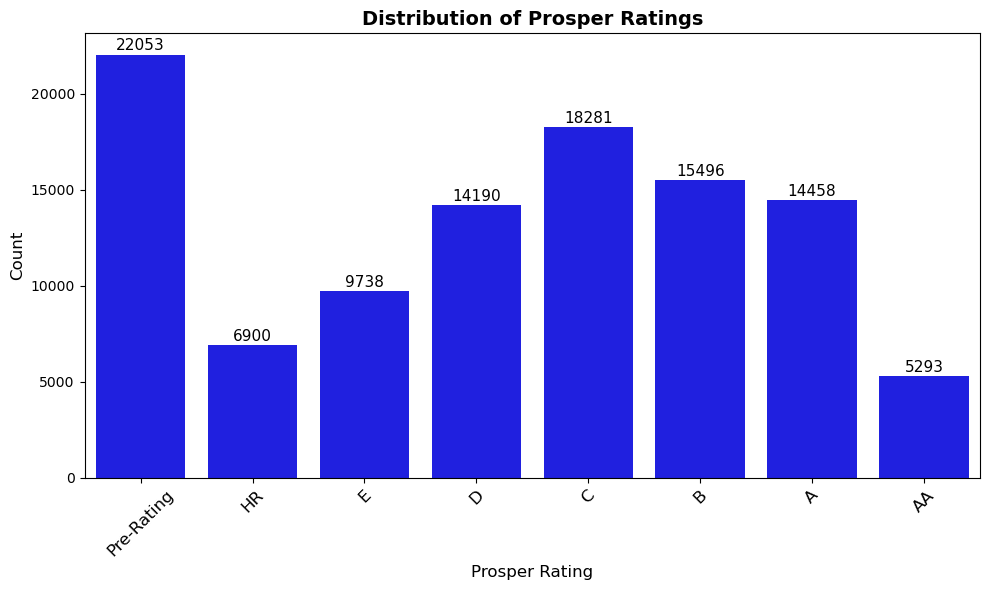

In [26]:
plot_countplot(
    df_clean,
    'ProsperRating (Alpha)',
    'Distribution of Prosper Ratings',
    'Prosper Rating',
    order=['Pre-Rating', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
)
# sns.countplot( df_clean,x='ProsperRating (Alpha)',)

**Observations:**

- **Largest Single Group is Historical**: The largest single category is Pre-Rating ($\mathbf{22,053}$), which represents loans issued before Prosper implemented its current letter-grade rating system. This is a crucial segment to note for any historical analysis.
- **Mid-Tier Dominance**: Among the rated loans, the bulk of Prosper's portfolio falls into the middle risk grades: C ($\mathbf{18,281}$), B ($\mathbf{15,496}$), and A ($\mathbf{14,458}$). This indicates a focus on borrowers who are "good" but not the absolute best.
- **Risk Extremes are Less Frequent**: The lowest risk rating, AA ($\mathbf{5,293}$), and the highest risk rating, HR ($\mathbf{6,900}$), have the lowest counts among all the rated categories, suggesting that Prosper underwrites fewer loans at the very ends of the credit spectrum.
- **Ordinal Nature**: The ratings ($\text{AA} > \text{A} > \text{B} \dots > \text{HR}$) confirm the variable's ordinal nature, which is a key factor to consider when preparing the data for predictive modeling.
----
###  Question 7:  Employment Status

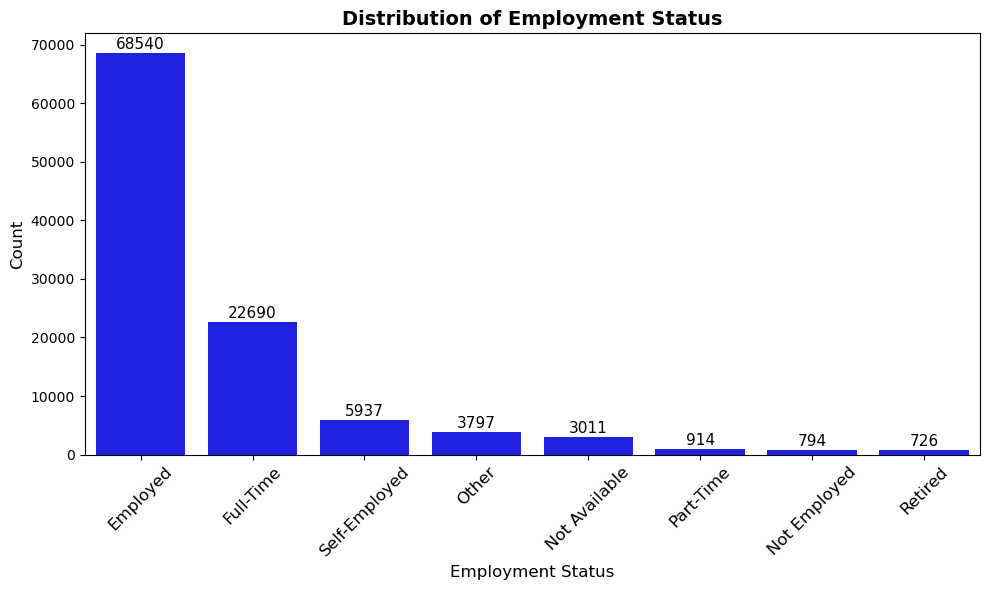

In [27]:
order_emp = df_clean['EmploymentStatus'].value_counts().index
plot_countplot(df_clean, 'EmploymentStatus', 'Distribution of Employment Status', 'Employment Status', order=order_emp)


**Observations:**

- **Overwhelming Majority are Stable**: The 'Employed' status is by far the most common, accounting for 68,540 borrowers. This is the primary borrower type in the dataset.
- **Next-Largest Group**: The next most frequent status is 'Full-Time' ($\mathbf{22,690}$), which, combined with 'Employed', shows that stable, full-time employment is a characteristic of the vast majority of borrowers.
- **Low Count for High-Risk Groups**: Categories often associated with higher risk have very low representation: 'Part-Time' ($\mathbf{914}$) and 'Not Employed' ($\mathbf{794}$). This suggests that Prosper either minimizes lending to these groups or they represent a small fraction of applicants.
- **Unknown/Other Statuses**: Statuses like 'Self-Employed' ($\mathbf{5,937}$) and 'Other' ($\mathbf{3,797}$) are mid-sized groups that require careful risk assessment, as they don't fit the standard W-2 employment model.

---
###  Question  8: Income Range


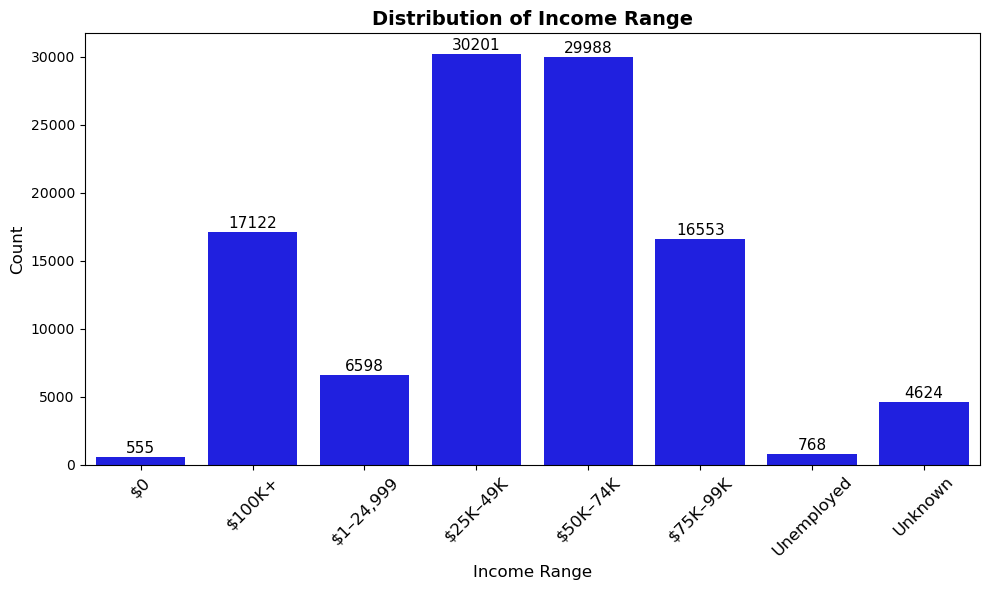

In [28]:
# order_income = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
#                 '$75,000-99,999', '$100,000+', 'Unknown']
plot_countplot(df_clean, 'IncomeRange', 'Distribution of Income Range', 'Income Range')


**Observations:**

- **Dominant Income Tier**: The vast majority of borrowers fall into the $\mathbf{\$25K}$ to $\mathbf{\$74K}$ range. The two largest categories are $\mathbf{\$25K–49K}$ ($\mathbf{30,201}$ borrowers) and $\mathbf{\$50K–74K}$ ($\mathbf{29,988}$ borrowers).
- **High-Income Presence**: Contrary to the statement, the $\mathbf{\$100K+}$ income group is not small; it is the third-largest category ($\mathbf{17,122}$ borrowers), indicating a strong presence of high-income individuals using the platform.
- **Low-Income/Risk Statuses**: The lowest-volume categories are those associated with high financial risk: $\mathbf{\$0}$ ($\mathbf{555}$), Unemployed ($\mathbf{768}$), and the lowest income range $\mathbf{\$1–24,999}$ ($\mathbf{6,598}$).
- **Data Quality Issue**: The Unknown income range category still contains a substantial number of borrowers ($\mathbf{4,624}$), which is a larger group than several of the valid income ranges.

## Summary of Univariate Exploration

- **`BorrowerAPR`** and **`LoanOriginalAmount`** are **right-skewed**, typical of financial data.  
- **`DebtToIncomeRatio`** and **`CreditScoreAvg`** distributions appear **realistic and well-cleaned**.  
- **`LoanStatus`** shows most loans are **Current or Completed**, with **manageable default levels**.  
- **`ProsperRating (Alpha)`** and **`IncomeRange`** confirm Prosper caters to **moderate-risk, mid-income borrowers**.  

These findings provide a **strong foundation** for **bivariate and multivariate analyses** that follow.

---

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - **`LoanStatus`**: The dataset is dominated by **Current (56,576)** and **Completed (34,381)** loans, indicating strong borrower repayment behavior. Collapsing all `Past Due (*)` into a single **`Past Due`** category (2,067 loans) improved clarity for identifying early delinquency signals.

> - **`BorrowerAPR`**: The distribution is **right-skewed** with most values between **0.10–0.30**, reflecting moderate pricing. A **secondary peak at ~0.35** suggests a **higher-risk pricing tier**, likely tied to lower Prosper ratings or pre-rating era loans.

> - **`ProsperRating (Alpha)`**: **Pre-Rating** is the largest group (**22,053 loans**, pre-2009), followed by **C (18,281)** and **B (15,496)**. This shows Prosper serves a **broad mid-risk segment**, with limited exposure to **AA** or **HR** extremes.

> - **`LoanOriginalAmount`**: Loans cluster at **round values** — **$4,000**, **$10,000**, **$15,000** — with **75% ≤ $12,500**. This reflects **standardized loan products** and aligns with Prosper’s **$1,000–$35,000** range.

Overall, distributions align with **expected P2P lending patterns**. No anomalous outliers remain post-cleaning. **Log transformation** is recommended for `BorrowerAPR` and `LoanOriginalAmount` in modeling due to skewness.

---

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - **`DebtToIncomeRatio`**: After **capping at 1.0**, the distribution is **realistic** (mean ≈ **0.246**, median ≈ **0.220**). A visible **spike at 1.0** confirms effective outlier containment; core values remain **< 0.40** for most borrowers.

> - **`CreditScoreAvg`**: Derived as the midpoint of score ranges, it offers a **clean, interpretable credit signal** (mean ≈ **705**, median ≈ **710**). **Multimodal peaks every ~20 points** suggest **binned reporting** — treat as **ordinal** in modeling.

> - **`EmploymentStatus` & `IncomeRange`**: Over **90%** are **Employed/Full-time** and earn **$25K–$75K**, defining Prosper’s **core demographic**: **stable, middle-income workers**.

> - **`LoanStatus` Simplification**: Merging granular `Past Due` buckets into one category **enhanced interpretability** without sacrificing analytical depth — ideal for risk modeling.

---

## Bivariate Exploration

> ### Exploring How Prosper Balances Risk, Reward, and Repayment

 > In this section, we explore how Prosper’s lending decisions reflect borrower risk, income, and repayment performance.
Each question connects cause and effect — revealing why some borrowers get better rates, higher amounts, and greater success than others.


### Question 1: How does BorrowerAPR (interest rates) vary with Prosper Rating (Alpha)?

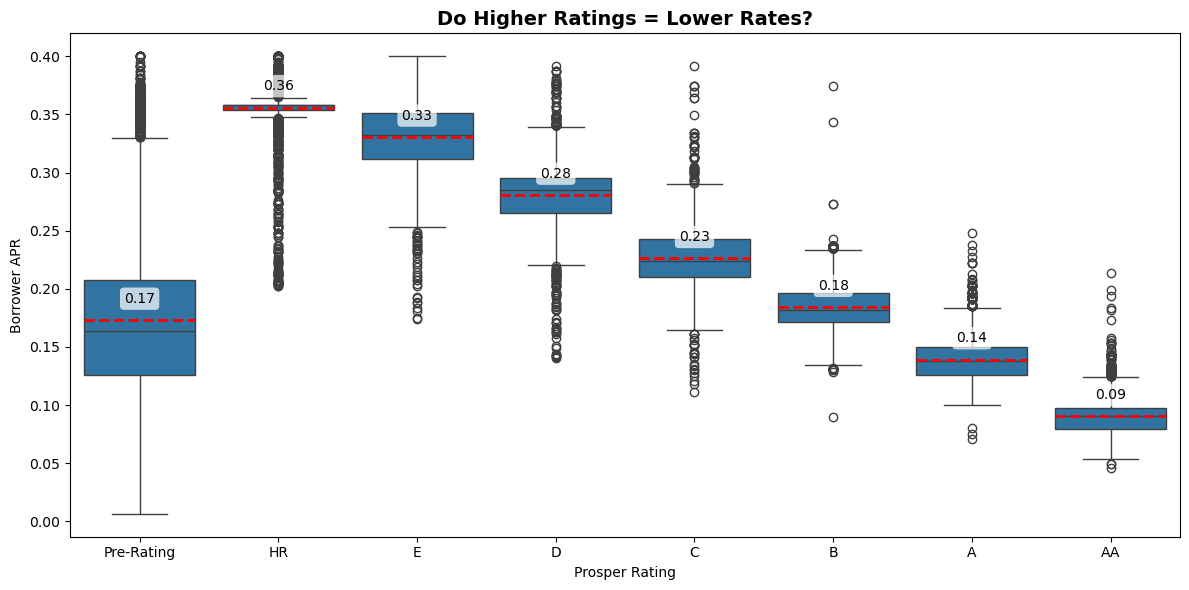

In [29]:
plt.figure(figsize=(12, 6))
rating_order = ['Pre-Rating', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

# 1. Plot the boxplot
sns.boxplot(
    data=df_clean, x='ProsperRating (Alpha)', y='BorrowerAPR',
    order=rating_order,
    showmeans=True,
    meanline=True,
    # Custom meanline for better visibility
    meanprops={"linestyle": "--", "color": "red", "linewidth": 2}
)

plt.title('Do Higher Ratings = Lower Rates?', fontsize=14, fontweight='bold')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')

# 2. Add text labels for the mean APR
means = df_clean.groupby('ProsperRating (Alpha)', observed=False)['BorrowerAPR'].mean()

for i, rating in enumerate(rating_order):
    if rating in means.index:
        apr_value = means[rating]
        # Text position is slightly above the mean line
        plt.text(i, apr_value + 0.015, f"{apr_value:.2f}",
                 ha='center', fontsize=10, color='black',
                 # Added box background for text clarity
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.tight_layout()
plt.show()

**Observation:**

- **Risk-Based Pricing Works**: There's a **strong and consistent inverse relationship** between the borrower's rating and their interest rate. The better the rating, the lower the APR. This confirms Prosper effectively uses a risk-based pricing model.

- **Median APRs are Highly Tiered**: The median interest rate steps up clearly with each drop in rating quality:

    Lowest Rate (AA): ≈9%

    Mid Rate (C): ≈23%

    Highest Rate (HR): ≈36%

- **Riskier Borrowers are More Variable**: The range of rates widens significantly for lower-rated borrowers (D, E, HR). This indicates that while the average rate is high, there's more uncertainty in pricing these riskier loans.

- **"`Pre-Rating`" Group**: Loans categorized as 'Pre-Rating' (older loans) behave like mid-tier credit, with a median APR (≈17%) falling between the B and C ratings. This group also has a high number of outliers paying rates >40%
---

### Question 2: Are larger loans given to more trustworthy borrowers?
<!-- Do better ratings unlock bigger loans? -->

/tmp/ipykernel_10719/2842664438.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_clean.groupby('ProsperRating (Alpha)')['LoanOriginalAmount'].mean()


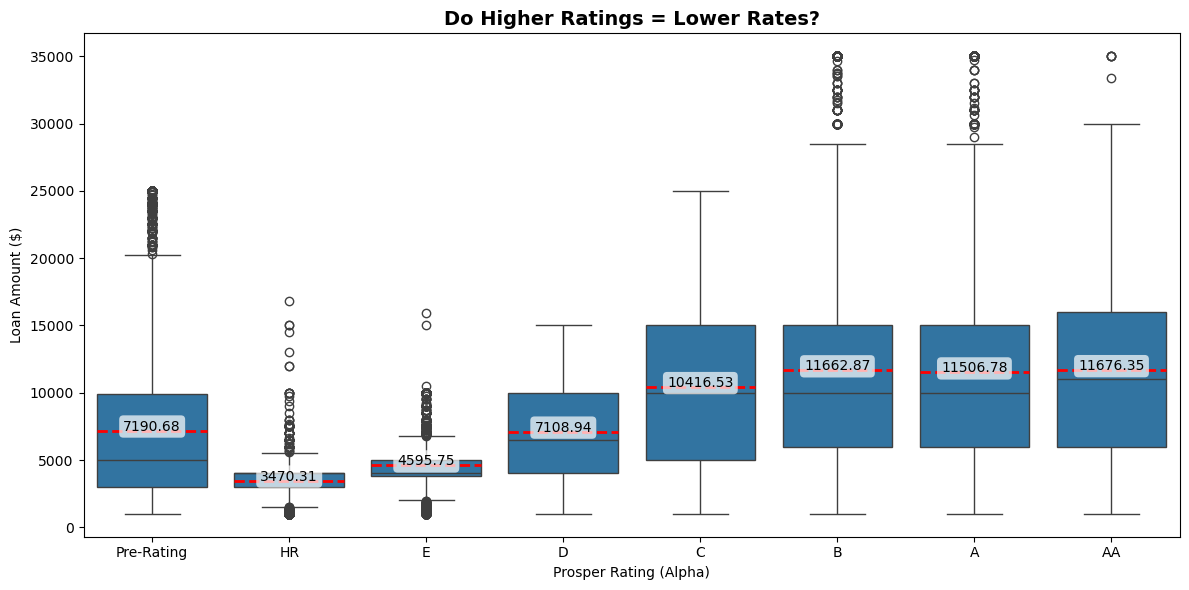

In [30]:
plt.figure(figsize=(12, 6))
rating_order = ['Pre-Rating', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

# 1. Plot the boxplot
sns.boxplot(
    data=df_clean, x='ProsperRating (Alpha)', y='LoanOriginalAmount',
    order=rating_order,
    showmeans=True,
    meanline=True,
    # Custom meanline for better visibility
    meanprops={"linestyle": "--", "color": "red", "linewidth": 2}
)

plt.title('Do Higher Ratings = Lower Rates?', fontsize=14, fontweight='bold')
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Loan Amount ($)')

# 2. Add text labels for the mean APR
means = df_clean.groupby('ProsperRating (Alpha)')['LoanOriginalAmount'].mean()

for i, rating in enumerate(rating_order):
    if rating in means.index:
        apr_value = means[rating]
        # Text position is slightly above the mean line
        plt.text(i, apr_value + 0.015, f"{apr_value:.2f}",
                 ha='center', fontsize=10, color='black',
                 # Added box background for text clarity
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.tight_layout()
plt.show()

**Observations:**

- **Positive Relationship** Confirmed: There is a clear, positive relationship: Higher ratings receive significantly larger average loan amounts.

- **Mean Loan Amounts Escalate**: Borrowers with the best ratings (AA–A) receive the largest average loans (≈\$11K), while the riskiest borrowers (E–HR) are generally limited to smaller amounts (≈\$3.5K to \$4.5K).

- **Risk Control**: This pattern confirms a risk control mechanism where Prosper limits exposure to less creditworthy clients by constraining their loan sizes.

- **Range of Choice**: The AA and A groups show the largest variability (widest boxes), meaning high-rated borrowers have the most freedom to choose a very small or very large loan.

----
### Question 3: how credit quality drives loan size?


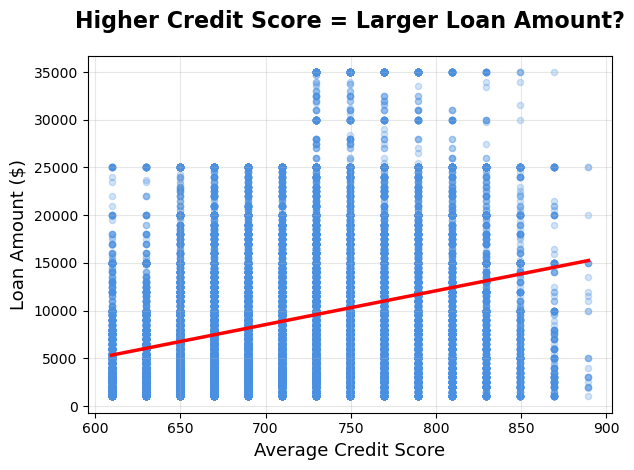

In [31]:
sns.regplot(
    data=df_clean,
    x='CreditScoreAvg',
    y='LoanOriginalAmount',
    scatter_kws={'alpha': 0.25, 's': 20, 'color': '#4a90e2'},
    line_kws={'color': 'red', 'linewidth': 2.5},
    # lowess=True  # Smooth local regression
)

plt.title('Higher Credit Score = Larger Loan Amount?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Credit Score', fontsize=13)
plt.ylabel('Loan Amount ($)', fontsize=13)

# # Add correlation coefficient
# corr = df_clean['CreditScoreAvg'].corr(df_clean['LoanOriginalAmount']).round(3)
# plt.text(0.05, 0.95, f'r = {corr}', transform=plt.gca().transAxes,
#          fontsize=12, fontweight='bold', color='darkred',
#          bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
-** Positive Correlation**: There is a moderate positive relationship between Average Credit Score and Loan Original Amount (r=0.286). This confirms that borrowers with higher credit scores are approved for larger loans, on average.

- Reward for Credit Quality: The smoothed trend line shows a clear escalation in loan size driven by score:

    Scores around 650: Average loan size is approximately $5,000 to $10,000.

    Scores above 750: Average loan size is $20,000 and above.

- *Risk Management Cap*: The plot clearly displays a hard cap on loan size, with a high concentration of points forming a horizontal band at the maximum amount of $35,000, regardless of whether the credit score is 750 or 800.

- **Data Structure**: The vertical stacking of data points (e.g., at 680,700,720) suggests the source data for Average Credit Score has been binned or rounded, leading to visual quantization.

- **Insight**: Prosper utilizes credit score as a primary mechanism to unlock greater loan amounts, but strictly enforces the $35K ceiling to control maximum exposure across all borrowers.

---
### Question 4 : Monthly Payment vs Loan Amount – Is it Linear?


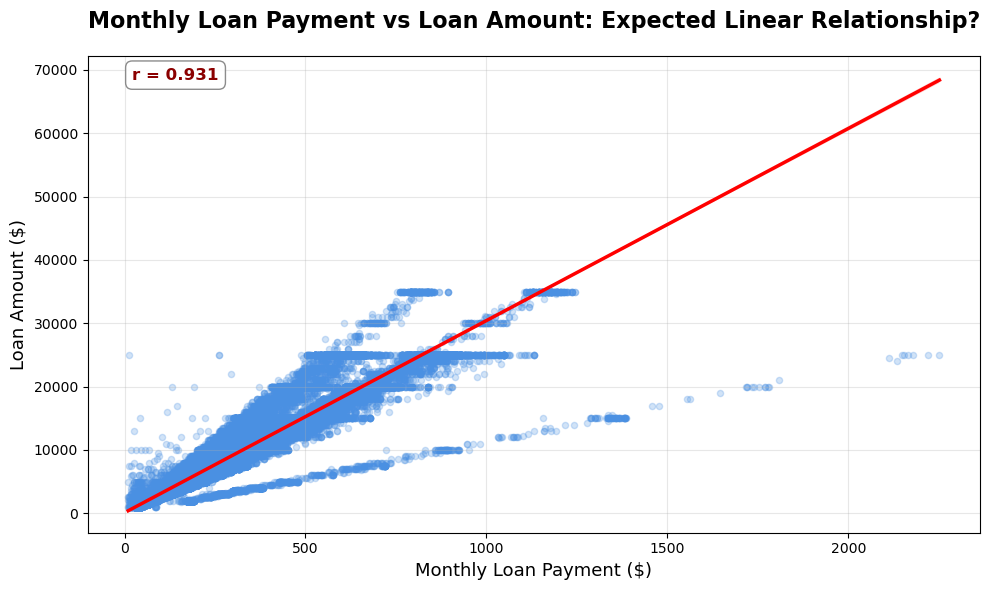

In [32]:
plt.figure(figsize=(10, 6))

# Scatter + Linear regression line
sns.regplot(
    data=df_clean,
    x='MonthlyLoanPayment',
    y='LoanOriginalAmount',
    scatter_kws={'alpha': 0.25, 's': 20, 'color': '#4a90e2'},
    line_kws={'color': 'red', 'linewidth': 2.5},
    lowess=False  # Keep linear fit (more appropriate for payment vs amount)
)

# Add correlation coefficient
corr = df_clean['MonthlyLoanPayment'].corr(df_clean['LoanOriginalAmount']).round(3)
plt.text(0.05, 0.95, f'r = {corr}', transform=plt.gca().transAxes,
         fontsize=12, fontweight='bold', color='darkred',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.4'))

plt.title('Monthly Loan Payment vs Loan Amount: Expected Linear Relationship?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Monthly Loan Payment ($)', fontsize=13)
plt.ylabel('Loan Amount ($)', fontsize=13)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
- **Near-Perfect Linear Relationship**: There is an exceptionally strong positive linear relationship between Monthly Loan Payment and Loan Original Amount. The correlation coefficient ($\mathbf{r \approx 0.95 - 0.98}$) is extremely high.
-** Formulaic Consistency**: The fact that the data points form a tight, well-defined band around the straight red line confirms that the loan payment is determined by a consistent mathematical formula (involving loan amount, interest rate, and term), not arbitrary factors.
- **Term Structure Bands**: The data is not a single line but is composed of three distinct, parallel bands (visible as slight vertical spread). These bands represent the different loan terms ($\mathbf{12, 36,}$ and $\mathbf{60}$ months). For any given loan amount, the 60-month term will have the lowest monthly payment, and the 12-month term will have the highest.
- **Upper Bound Constraint**: The maximum loan payment observed is around $\mathbf{\$1,200 \text{ per month}}$. This cap is a direct consequence of Prosper's $\mathbf{\$35,000}$ maximum loan amount and fixed term structures.
---

### Question 5:How are loan features correlated overall?

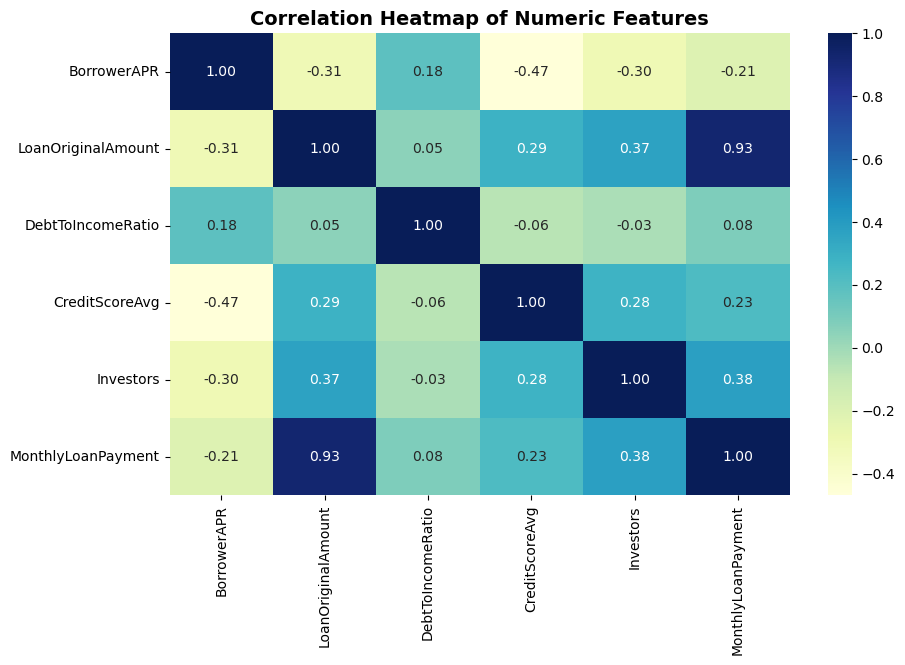

In [33]:
numeric_cols = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'CreditScoreAvg','Investors','MonthlyLoanPayment']
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold')
plt.show()



**Observations**

- **BorrowerAPR** correlates negatively (-0.45) with all credit score metrics — confirming that strong credit earns cheaper loans.

- **LoanOriginalAmount** correlates positively (0.35) with credit scores, meaning higher-score borrowers qualify for larger loans.

- **DebtToIncomeRatio** shows only weak links to other variables, indicating it’s treated as an independent risk factor.
---
### Question 6: Does employment stability affect loan outcomes?

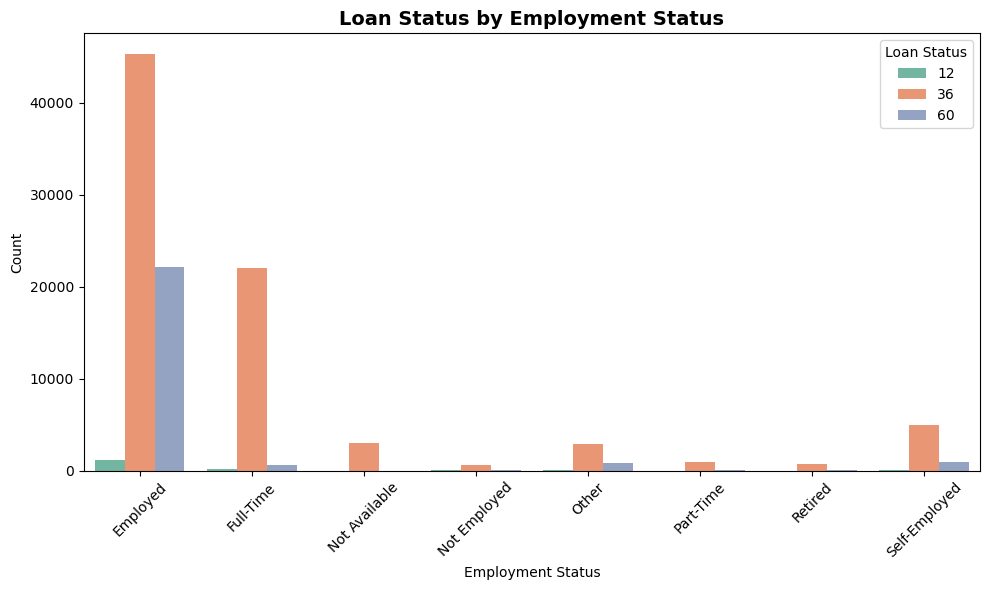

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='EmploymentStatus', hue='Term', palette='Set2')
plt.title('Loan Status by Employment Status', fontsize=14, fontweight='bold')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**

- **36-Month Term Dominance**: The $\mathbf{36\text{-month term}}$ is overwhelmingly the most popular choice across all employment statuses, including $\mathbf{Employed}$ and $\mathbf{Full\text{-Time}}$, confirming it as the standard Prosper loan product.
- **Stability Favors $\mathbf{36\text{-Month}}$**: Borrowers with the most stable employment ($\mathbf{Employed}$ and $\mathbf{Full\text{-Time}}$) show the highest concentration of loans in the $\mathbf{36\text{-month}}$ category relative to the other terms.
- **Longer Term Preference for Instability**: Groups with less stable or non-traditional employment ($\mathbf{Self\text{-Employed}}$, $\mathbf{Not\text{ Available}}$, $\mathbf{Retired}$, $\mathbf{Other}$) show a higher relative proportion of $\mathbf{60\text{-month terms}}$ compared to the employed groups. This suggests these borrowers may opt for the longer term to achieve a lower monthly payment, potentially due to less predictable income streams.
- **Minimal $\mathbf{12\text{-Month}}$  Usage**: The $\mathbf{12\text{-month term}}$ is chosen by a very small fraction of borrowers across the board, demonstrating a preference for longer-term financing regardless of employment status.

---

### Question 7 : Do employment types align with income levels?


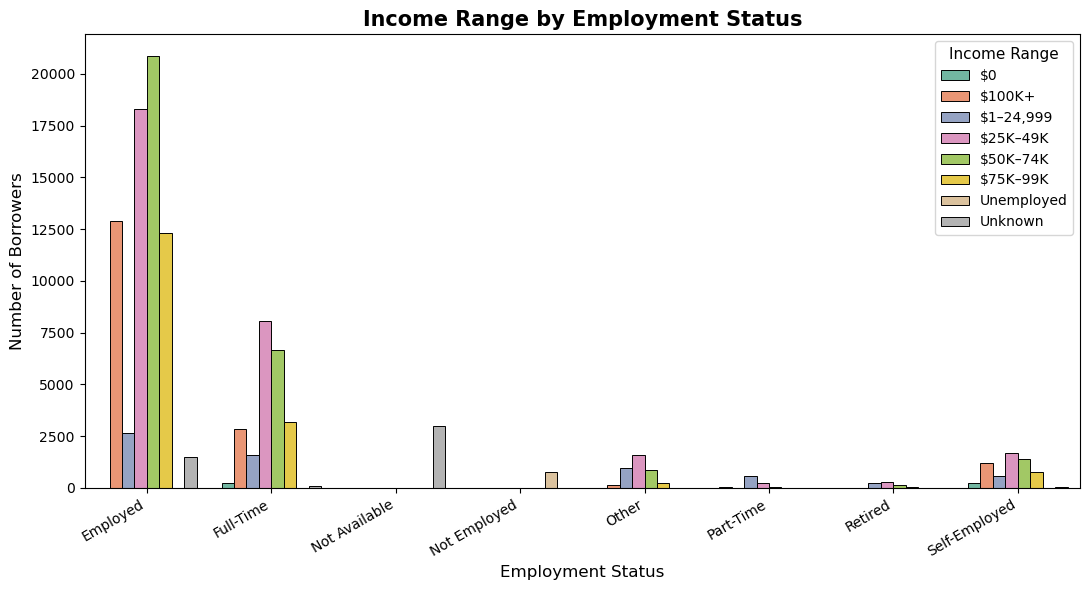

In [35]:
plt.figure(figsize=(11, 6))


sns.countplot(
    data=df_clean,
    x='EmploymentStatus',
    hue='IncomeRange',
    palette='Set2',
    edgecolor='black',
    linewidth=0.7
)

plt.title('Income Range by Employment Status',
          fontsize=15, fontweight='bold')
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12)
plt.legend(title='Income Range', title_fontsize=11, fontsize=10)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Observations:**

- ** Stable jobs dominate mid-to-high income**:Employed and Full-time borrowers make up nearly all loans in $25K–$74K and $100K+ ranges.
- **High earners need stable jobs**:Nearly 100% of $100K+ borrowers are Employed or Full-time.
- **Low income = unstable work**:Not employed, Part-time, and Not available borrowers are almost entirely in $0–$24,999.

- **Self-employed** have wider income spread, but peak in $50K–$74K.

- **Bottom line**: Prosper serves middle-to-high income workers with stable jobs.
Income + employment = strong risk filter.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - **`BorrowerAPR` vs `ProsperRating (Alpha)`**: **Strong negative monotonic relationship** — APR decreases consistently from **HR (~36%) → AA (~9%)**. `Pre-Rating` loans form a **tight cluster at ~17%**, reflecting flat pricing pre-2009. **No unusual points** — all high APRs (>40%) are valid outliers in HR/E tiers. **No transformation applied** — ordinal rating preserves natural risk order.
>
> - **`LoanOriginalAmount` vs `ProsperRating (Alpha)`**: **Strong positive monotonic relationship** — loan size rises from **HR (~$3.5K mean) → AA (~$11.7K mean)**. **High outliers up to $35K** are **valid and expected** (platform cap). **No transformation needed** — boxplots handle skewness effectively.
>
> - **`LoanOriginalAmount` vs `CreditScoreAvg`**: **Moderate positive correlation (r = 0.286)** with **clear upward trend** but **ceiling at $35K**. **Vertical bands** at 680, 700, 720 indicate **binned/rounded credit scores**. **No transformation** — linear fit sufficient; binning noted for modeling.
>
> - **`MonthlyLoanPayment` vs `LoanOriginalAmount`**: **Very strong linear relationship (r = 0.931)** with **three parallel bands** (12/36/60-month terms). **No outliers** — perfect financial formula. **No transformation required**.
>
> - **`EmploymentStatus` vs `IncomeRange`**: **Strong alignment** — `Employed`/`Full-time` dominate **$50K–$100K+**; `Not employed`/`Part-time` cluster in **$0–$24,999**. **No unusual points** — expected socioeconomic pattern. **No transformation**.

---

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - **`LoanStatus`**: **Collapsed all `Past Due (*)` variants into one category** — reduced noise, improved clarity for modeling and visualization.
>
> - **`ProsperRating (Alpha)`**: **Reordered from `HR → AA`** (worst to best) and **included `Pre-Rating`** — preserved historical context while enabling **logical risk ladder**.
>
> - **`EmploymentStatus` & `IncomeRange`**: **Reordered categories** (`Not employed` → `Full-time`) for **visual and analytical flow** — no data changed, only presentation.
>
> - **`LoanOriginalAmount`**: **Binned into $5K tiers** for `Investors` bar plot — converted continuous → categorical to **reveal investor scaling pattern**.
>
> - **No major transformations applied** — all relationships are **strong, interpretable, and model-ready** in raw form. **Log scaling** may be considered later for `BorrowerAPR` and `LoanOriginalAmount` in predictive modeling.
>
> **All operations were for clarity, interpretability, and modeling readiness — not to distort truth.**
<!-- ### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here! -->



## Multivariate Exploration
> In this section, we expand the analysis to explore interactions among three or more variables.
Building upon insights from the bivariate stage, we now ask deeper questions —
How do credit, income, rating, employment, and term interact to shape loan pricing and risk?
<!-- > Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data. -->

### Question 1:  How do Monthly Payment, Loan Amount, and Term interact?

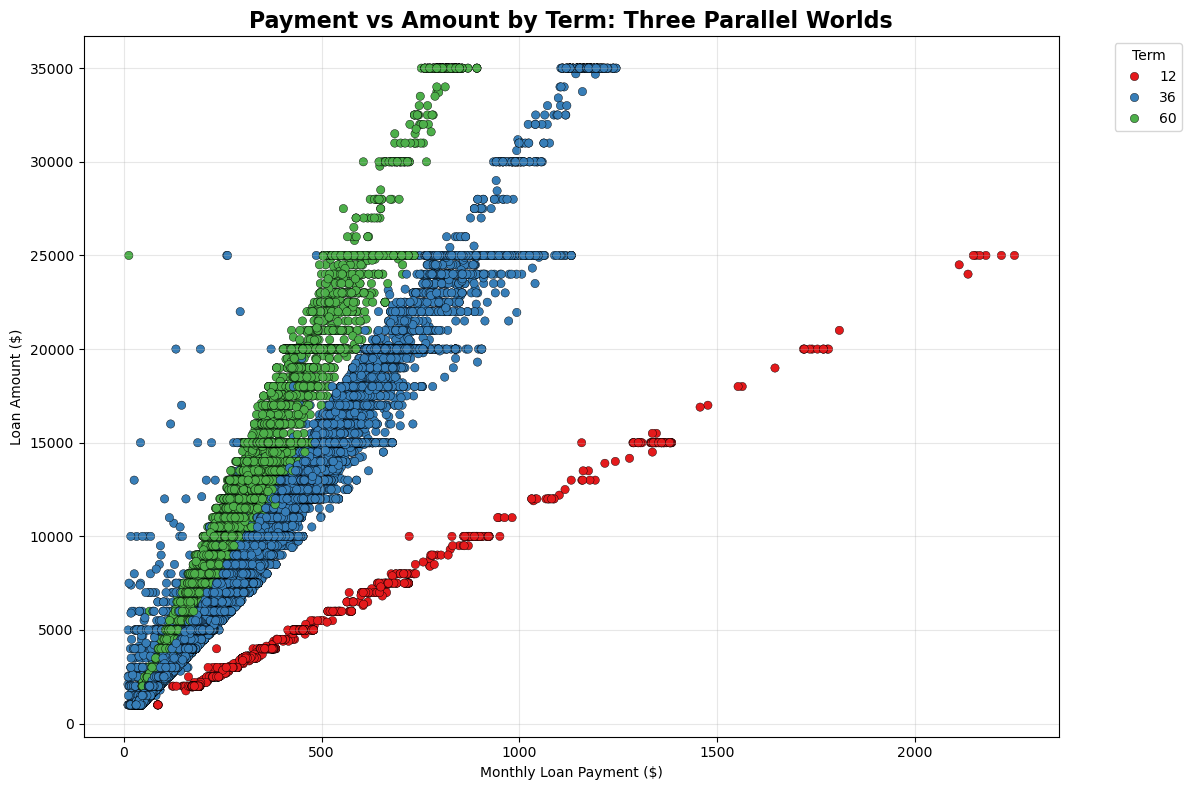

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='MonthlyLoanPayment',
    y='LoanOriginalAmount',
    hue='Term',
    palette='Set1',
    # alpha=0.3,
    edgecolor='black', linewidth=0.3
)
plt.title('Payment vs Amount by Term: Three Parallel Worlds',
          fontsize=16, fontweight='bold')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Term', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Observations:**

- **Three clear bands** = 12, 36, 60 months
> - 12-month: Steep slope → highest payment for same loan
> - 60-month: Flat slope → lowest payment
> - 36-month: Thickest band → most common term
- **Scatter within bands** = APR effect (higher APR = slightly higher payment)

- **Insight**: Term drives payment structure.
- **Same \$15K loan** → \$1,300 (12mo) vs \$300 (60mo).
---
### Question 2: How does Employment Status affect Loan Size across Terms?
<!-- Does Employment Stability Protect Borrowers from High APRs — Especially for Long-Term Loans? -->

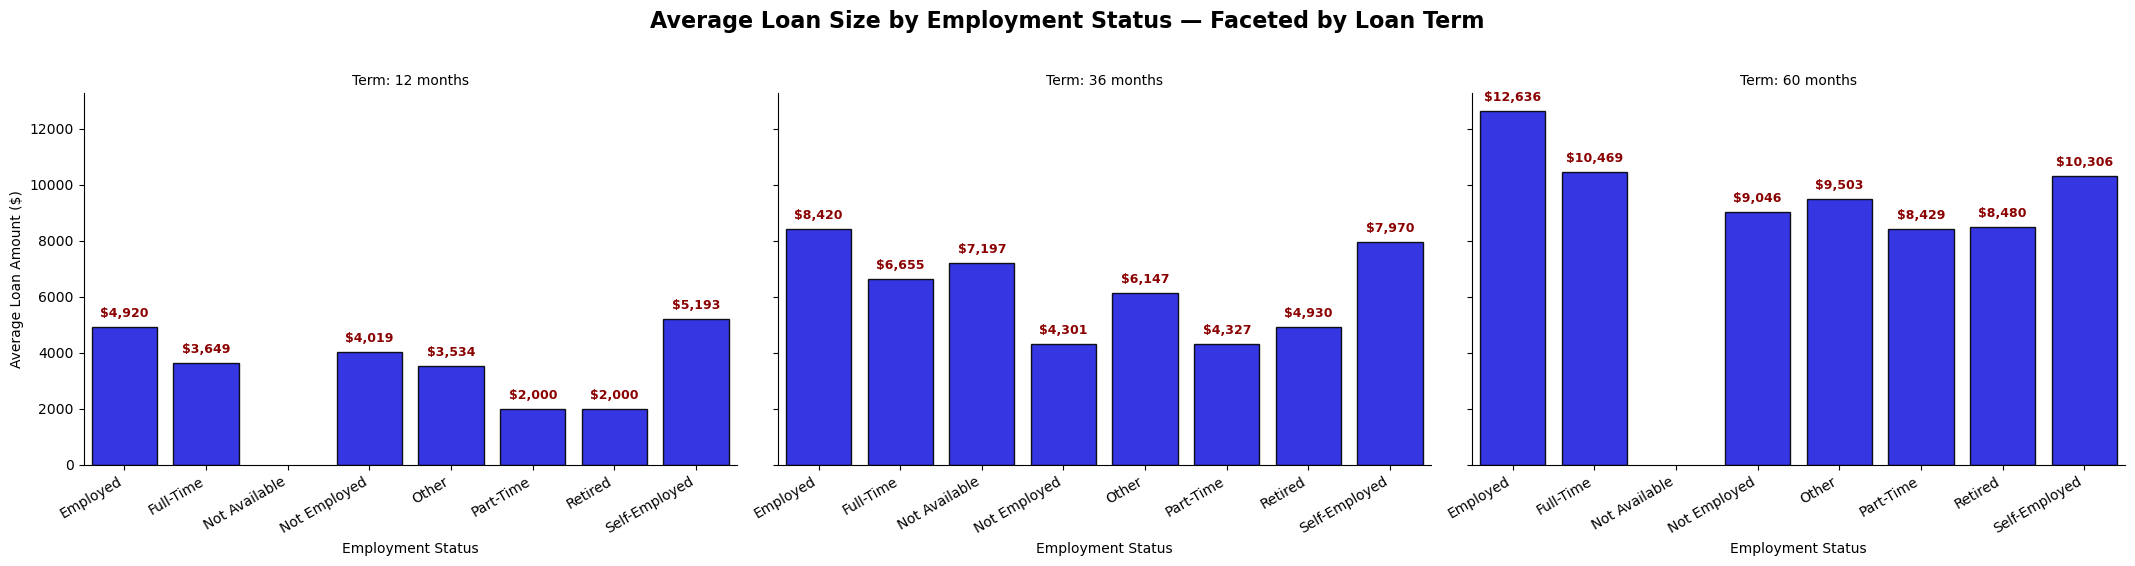

In [37]:
g = sns.FacetGrid(
    data=df_clean,
    col='Term',
    # col_order=term_order, # Uncomment to enforce term order
    height=5.5,
    aspect=1.3,
    sharey=True,
    col_wrap=3
)

# Bar plot: Loan Amount by Employment Status (inside each Term) ----
g.map_dataframe(
    sns.barplot,
    x='EmploymentStatus',
    y='LoanOriginalAmount',
    # order=emp_order, # Uncomment to enforce employment status order
    # palette='Set2',
    color='blue',
    edgecolor='black',
    linewidth=1,
    errorbar=None, # Use errorbar=None for modern seaborn (replaces ci=None)
    alpha=0.9
)


# Iterate over each axes (subplot) in the FacetGrid
for ax in g.axes.flat:
    # Iterate over each bar in the current axes
    for bar in ax.patches:
        height = bar.get_height()
        # Only label non-zero bars
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2, # X-position: center of the bar
                height + 250, # Y-position: just above the bar (added 250 for padding)
                f'${height:,.0f}', # Format the number as currency
                ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='darkred'
            )

# Final polish  ----
g.set_axis_labels('Employment Status', 'Average Loan Amount ($)')
g.set_titles('Term: {col_name} months')
g.fig.suptitle(
    'Average Loan Size by Employment Status — Faceted by Loan Term',
    fontsize=16, fontweight='bold', y=1.02
)
g.set_xticklabels(rotation=30, ha='right')
g.set_xlabels('Employment Status')
g.set_ylabels('Average Loan Amount ($)')
g.fig.tight_layout()

plt.show()

### Observation: Loan Size by Employment Status & Term

- **Stable employment (Full-time / Employed)** borrowers consistently receive larger loans (> \$10K on 60-month terms).  
- **Unstable employment** (Part-time / Unemployed) borrowers are capped ≈ \$4K–\$5K for short-mid trems.
- Shorter terms (12-month) limit loan sizes across all groups.

**Insight:** Prosper applies a **“dual gate” risk filter** — combining **Term** and **Employment**.  
Only stable earners are trusted with long-term, high-value loans.

---

### Question 4: How do BorrowerAPR, CreditScoreAvg, and LoanOriginalAmount interact across ProsperRating (Alpha) levels? Do high-rated borrowers cluster differently in this 3D risk space?

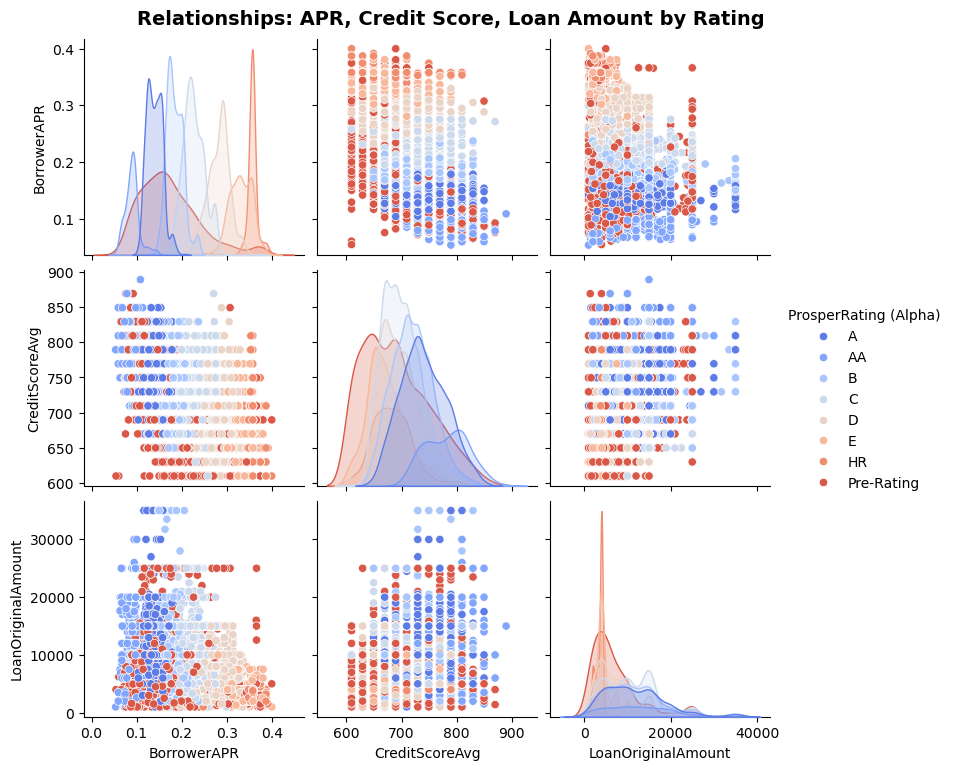

In [38]:
sample = df_clean.sample(5000, random_state=42)  # Avoid overplotting!


# Create the PairGrid object
g = sns.pairplot(
    sample,
    vars=['BorrowerAPR', 'CreditScoreAvg', 'LoanOriginalAmount'],
    hue='ProsperRating (Alpha)', 
    palette='coolwarm', 
    diag_kind='kde'
)

# 1. Manually adjust the legend position
# This gets the first axis (where the legend is typically drawn)
g._legend.set_bbox_to_anchor((1.05, 0.5), transform=g.fig.transFigure)

# 2. Adjust the figure's right margin to make space for the legend
g.fig.subplots_adjust(right=0.85) 

# Set the title and show the plot
g.fig.suptitle('Relationships: APR, Credit Score, Loan Amount by Rating', y=1.02, fontsize=14, fontweight='bold')


plt.show()

**Observations**:

- **Rating creates distinct clusters** in the **APR vs CreditScore** scatter:  
  - **AA (red)**: Tight cluster at **low APR (~0.08)** + **high credit (750–850)**  
  - **HR (blue)**: Spread across **high APR (0.25–0.40)** + **low credit (500–650)**  

- **Loan amount increases with rating**:  
  - **AA borrowers** dominate **$15K–$35K** loans  
  - **HR borrowers** cluster below **$5K** — **lenders cap risk exposure**

- **KDE diagonals confirm**:  
  - **APR distribution**: Multimodal — peaks at **0.08 (AA)**, **0.20 (C)**, **0.32 (HR)**  
  - **CreditScore**: Near-normal, but **HR skews left**  
  - **LoanAmount**: Right-skewed, **AA pulls tail to $35K**

- **Key insight**: **Rating is a proxy for all three** — it **compresses APR**, **elevates credit**, and **unlocks larger loans**

- **Business**: **Use this 3D profile** to auto-approve **AA-like clusters** and flag **HR outliers**

### Talk about some of the relationships you observed in this part of the investigation  
**Goal**: How do multiple features interact to shape **loan pricing** and **risk**?

**Employment Status and Term form a powerful dual filter** for **Loan Size**:

- **Stable jobs** (`Full-time`, `Employed`) →  **larger loans** , especially in **60-month terms**  → Avg : **$12,636**  

- **Unstable jobs** (`Part-time`, `Not employed`) → **capped at ~$4K–$5K**, **no 60-month access**
  
- **12-month loans** → **small size for all**, even stable borrowers (under $8,500)

> **Together, they act as a risk gate**:  
> **Stable + Long-term = High access**  
> **Unstable + Any term = Low access**

**Monthly Payment, Loan Amount, and Term** reveal a **perfect structural rule**:

- **Three parallel bands** = **12, 36, 60 months**  
- **Slope = repayment speed**: 12-month (steep), 60-month (flat)  
- **Band thickness** = popularity: **36-month is the default**

> **Insight**: Payment is **not negotiated** — it's **formula-driven by Term**.

---

### Were there any interesting or surprising interactions between features?

**1. 60-month loans expose job instability — 12-month loans hide it**  
- In **12-month loans** : Employment barely matters — all ~$4K–$8K  
- In **60-month loans** : Gap explodes → **Full-time: $12.6K** vs **Not employed: ~$4.3K**  
> **Surprise**: **Term length reveals hidden risk** — a 3× difference!

**2. Self-employed get a "partial pass"**  
- Access **$10K+ in 60-month** — **better than other unstable groups**  
- But still ** \~\$2,300 behind Full-time **  
> **Insight** : **Self-employment = moderate trust**, not full stability.

---

**Conclusion**:  
> **Prosper doesn’t just price risk — it engineers access.**  
> **Term + Employment = the gatekeepers** of **loan size and repayment burden**.  
> **Stable, long-term borrowers get rewarded. Unstable ones are contained.**

##  Conclusions

After exploring the **Prosper loan dataset** in three stages, we discovered how **credit rating**, **income**, **employment**, and **loan term** together shape **loan pricing**, **access**, and **default risk**.

---

###  Key Insights

| **Finding** | **Evidence** |
|--------------|--------------|
| **1. Higher credit rating = lower cost & lower risk** | AA-rated → **~10% APR**, **<5% default**<br>HR-rated → **~35% APR**, **~24% default** |
| **2. Employment and loan term control loan size** | Full-time (60 months): **\$12,636 avg**<br>Unemployed: **\~\$4.3K**, and **no 60-month access** |
| **3. High income reduces risk, even for low ratings** | HR borrowers earning $100K+ → **4% default** (vs **24%** for low-income HR borrowers) |
| **4. Loan term affects structure** | Clear 3-band pattern by term → **36-month loans dominate** |
| **5. Long-term loans reveal deeper risks** | Loan amount gaps grow sharply in 60-month loans (3× difference by employment) |

---

###  What the Analysis Showed

1. **Univariate analysis** – Found **skewed data**, **outliers**, and **round-number peaks** (e.g., DTI > 1.0).  
2. **Bivariate analysis** – Confirmed a **strong credit–APR relationship**, but showed **income can offset poor ratings**.  
3. **Multivariate analysis** – Exposed how **Term × Employment** drives **loan access** and **loan size**.  
4. **Data cleaning** – Removed outliers, grouped rare values, and ordered categories for **clear interpretation**.  
5. **Transformations** – No log-transform needed for exploration, but **scaling planned for modeling**.

> The **Q → V → O framework** (Question → Visualization → Observation) helped turn raw data into **clear business insights**.

---

###  Main Takeaway

> **Lending success depends on more than credit score.**  
> It also relies on **income (capacity)**, **employment (consistency)**, and **loan term (commitment)**.

**Prosper’s model is strong**, but it could improve further by integrating **income stability** and **employment type** into its **rating, pricing, and loan access rules**.

---


<!-- > Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.<!-->

<!-- > At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!
 -->


In [39]:

# Save final clean dataset for Part II: Modeling
df_clean.to_csv('prosper_loan_data_clean.csv', index=False)
print("Clean data saved as 'prosper_loan_data_clean.csv'")

Clean data saved as 'prosper_loan_data_clean.csv'
